# Principal Component Analysis #

## 1. Klasyfikacja ##
![](./images/classification.png)

### 1.1. Definicja problemu ###

* Dany jest skończony zbiór obiektów $ T = \{ x_{1},...,x_{n}\}$. Ten zbiór nazywamy zbiorem treningowym.

* Każdy obiekt (rekord) jest opisany wektorem informacyjnym, składającym się z wartości pochodzących z dziedziny pewnych atrybutów warunkowych, tzn. $x_i = (x_{i,1},...,x_{i,m})$.

* Wyróżniony jest jeszcze jeden atrybut, zwany też atrybutem decyzyjnym, klasą danego elementu, oznaczać go będziemy przez $y_i$.

* Znany jest również zbiór klas $C = \{c_1,..., c_k\}$, każde $y_i \in C$.

* Jest to zagadnienie typu **supervised learning**.

**Cel**: wyznaczyć klasę decyzyjną, do której należy nowy nieznany dotąd obiekt. 

**Jak?**: Znaleźć zależność (najlepiej funkcyjną) między atrybutem decyzyjnym a atrybutami warunkowymi.

Tworzenie modelu: opisywanie klas decyzyjnych

**Klasa decyzyjna**: zbiór obiektów mających taką samą wartość na atrybucie decyzyjnym

**Klasyfikator**: algorytm określenia klasy decyzyjnej obiektów za pomocą ich wartości na atrybutach warunkowych.

Klasyfikatory mogą być opisane za pomocą formuł logicznych, drzew decyzyjnych lub formuł matematycznych.

### 1.2. Metody klasyfikacji ###

* Drzewa Decyzyjne,
![](./images/dt.png)
* Lasy losowe,
![](./images/rf.png)
* Sieci neuronowe,
![](./images/nn.png)
* K-Nearest Neighbor.
![](./images/knn.png)

## 2. Klasteryzacja ##
![](./images/cluster.png)

### 2.1. Definicja problemu ###
* Dany jest skończony zbiór obiektów $ T = \{ x_{1},...,x_{n}\}$. Ten zbiór nazywamy zbiorem treningowym.

* Każdy obiekt (rekord) jest opisany wektorem informacyjnym, składającym się z wartości pochodzących z dziedziny pewnych atrybutów warunkowych, tzn. $x_i = (x_{i,1},...,x_{i,m})$.

* Wśród opisanych obiektów szukamy pewnych zależności, które wiążą rekordy w wyraźnie odseparowane grupy (klastry).

* Jest to zagadnienie typu **unsupervised learning**.

**Cele**:
   - uzyskanie jednorodnych przedmiotów badania, ułatwiających wyodrębnienie ich zasadniczych cech,
   - zredukowanie dużej liczby danych pierwotnych do kilku podstawowych kategorii, które mogą być traktowane jako przedmioty dalszej analizy,
   - zmniejszenie nakładu pracy i czasu analiz, których przedmiotem będzie uzyskanie klasyfikacji obiektów typowych,
   - odkrycie nieznanej struktury analizowanych danych,
   - porównywanie obiektów wielocechowych.

### 2.2. Przykłady algorytmów ###
* K-Means Clustering,
![](./images/kmeans.png)
* Affinity Propagation,
![](./images/aff.png)
* EM Clustering.
![](./images/emc.png)

## 3. PCA (Analiza głównych składowych, Principal Component Analysis)##


Metoda ta polega na wyznaczeniu $k$ wzajemnie ortogonalnych $n$-wymiarowych wektorów, które najlepiej reprezentują dane. Oczywiści $k \leq n$.

Następnie oryginalne dane są rzutowane na przestrzeń rozpiętą przez $k$ wybranych wektorów (tzw. **składowe główne**), zatem uzyskujemy **redukcję wymiaru** przestrzeni cech (z $n$ do $k$).

Główne kroki algorytmu:
1. Unormowanie cech.
2. Obliczenie składowych głównych.
3. Sortowanie składowych głównych od najmocniejszych do najsłabszych.
4. Wybranie $k$ znaczących składowych głównych, usunięcie pozostałych.

Poza redukcją wymiaru uzyskujemy również **zachowanie wariancji** najważniejszych cech.

# 4. Kernel PCA #

Transformacja danych opisana w metodzie PCA jest przekształceniem liniowym, zatem świetnie spisuje się ona w problemach, gdzie klasy są **liniowo separowalne** (tzn. zbiory punktów różnych klas można oddzielić hiperpłaszczyzną). Jednakże, często mamy do czynienia ze zbiorami danych, w których klas nie da się liniowo odseparować. Wtedy dobrym rozwiązaniem okazuje się zastosowanie metody *Kernel PCA*.

![](./images/nonlinear.png)

*Na czym polega Kernel PCA*?

Niemożliwość liniowego odseparowania punktów można rozwiązać poprzez przekształcenie rozważanego zbioru danych do przestrzeni o wymiarze **większym** niż obecny. Wtedy badane przez nas klasy punktów mogą być w łatwy sposób oddzielone. 
Takie nieliniowe przekształcenie nazywamy *kernel function*, ozn.:

$x \rightarrow \phi(x)$

Zatem funkcje $\phi$ przekształca elementy przestrzeni pierwotnego wymiaru do przestrzeni o większym wymiarze (wykorzystując nieliniowe operacje matematyczne).

Przykładowo:
![](./images/kernel_fun.png)

A także:
Zbiór nieseparowalnych punktów w $R^2$:
![](./images/r2.png)

Przekształcenie:
![](./images/wzor.png)


Zbiór separowalnych punktów w $R^3$:
![](./images/r3.png)

Kernelem nazywamy przekształcenie:

$ \kappa(x_i,x_j)= \phi(xi)^T \cdot \phi(xj) $  <-- ("dot product")



## Przykłady ##

Importujemy biblioteki

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from random import randint
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

Pobieramy jeden z najbardziej popularnych zbiorów danych - *iris dataset*, zapisujemy go w DataFrame'ie.

In [90]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Rozdzielamy *df* na część zawierającą cechy próbek (x) oraz część opisującą klasę, do której należy dana próbka (y). Następnie przeprowadzamy normalizację wartości x.

In [91]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width'] # nazwy cech

x = df.loc[:, features].values

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

### Zastosowanie algorytmu PCA ###

Oryginalne dane są opisane za pomocą czterech kolumn (sepal length, sepal width, petal length, and petal width), a więc są to elementy przestrzeni 4-wymiarowej. Dzięki **PCA** uzyskamy rzutowanie tych cech na przestrzeń 2-wymiarową generowaną przez tzw. **główne składowe** (principal components).

In [92]:
# parametr n_components określa wymiar przestrzeni, do której rzutujemy zbiór danych
pca = PCA(n_components=2)

# wykonanie obliczeń
principal_components = pca.fit_transform(x)

# zapisanie wyniku w dataframe'ie
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [93]:
finalDf = pd.concat([principal_df, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Po przeprowadzonej transformacji nasz zbiór danych opisują dwie cechy (*principal component 1*, *principal component 2*). Model został zatem uproszczony.

**Wizualizacja**

Pojawiła się również szansa wiarygodnego przedstawienia zbioru danych w przestrzeni 2-wymiarowej.

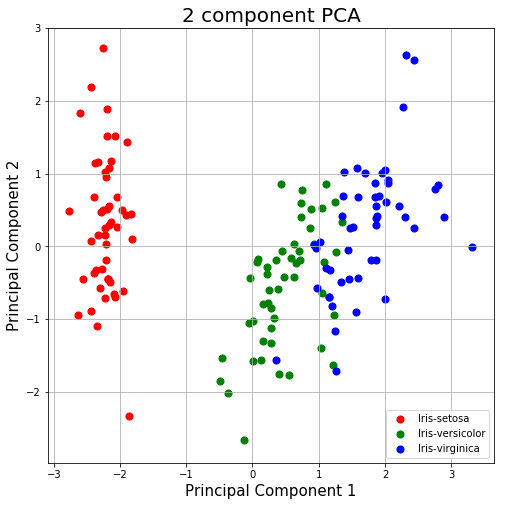

In [94]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

Atrybut *explained_variance_ratio_* informuje nas jaką część wariancji zbioru danych oddają kolejne wartości własne.

In [95]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

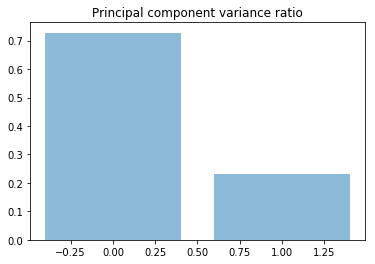

In [96]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, align='center', alpha=0.5)
plt.title('Principal component variance ratio')
plt.show()

Wniosek: pierwsza główna składowa reprezentuje aż 72,3% wariancji w badanym zbiorze, druga 23%, reszta wartości jest stosunkowo mała.

Możemy również przeprowadzić rzutowanie do przestrzeni o tym samym wymiarze.

In [97]:
pca_all = PCA(n_components=None)
pca_all.fit_transform(x)
pca_all.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

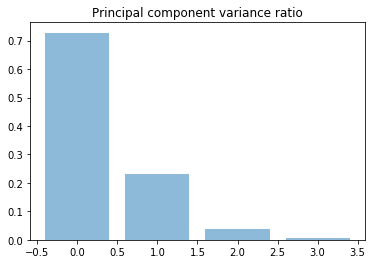

In [98]:
plt.bar(range(pca_all.explained_variance_ratio_.shape[0]), pca_all.explained_variance_ratio_, align='center', alpha=0.5)
plt.title('Principal component variance ratio')
plt.show()

PCA z trzema komponentami.

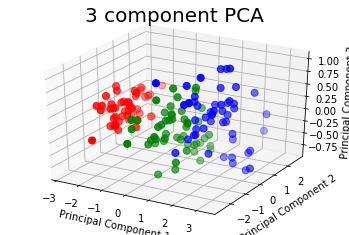

[0.72770452 0.23030523 0.03683832]


In [99]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components,
                           columns=['principal component 1', 'principal component 2',
                                    'principal component 3'])

final_df = pd.concat([principal_df, df[['target']]], axis=1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=10)
ax.set_ylabel('Principal Component 2', fontsize=10)
ax.set_zlabel('Principal Component 3', fontsize=10)

ax.set_title('3 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
               final_df.loc[indicesToKeep, 'principal component 2'],
               final_df.loc[indicesToKeep, 'principal component 3'], c=color, s=50)

ax.grid()
plt.show()

print(pca.explained_variance_ratio_)

## Zastosowanie Kernela PCA ##

In [31]:
from sklearn.decomposition import KernelPCA

Tworzymy własny zbiór danych o nieliniowych zależnościach, korzystamy z funkcji *make_circles()*.

In [22]:
np.random.seed(0)
X, y = make_circles(n_samples=500, factor=.3, noise=.05)

In [23]:
# Przygotowujemy model Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=2)
X_kpca = kpca.fit_transform(X)

# Przygotowujemy model PCA
pca = PCA()
X_pca = pca.fit_transform(X)

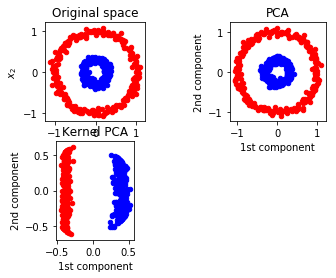

In [24]:
# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

# Dane oryginalne
plt.scatter(X[reds, 0], X[reds, 1], c="r", s=20)
plt.scatter(X[blues, 0], X[blues, 1], c="b", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Wizualizacja uzyskana za pomocą PCA
plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="r", s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="b", s=20)
plt.title("PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")

# Wizualizacja uzyskana za pomocą Kernel PCA
plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="r", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="b", s=20)
plt.title("Kernel PCA")
plt.xlabel(r"1st component")
plt.ylabel("2nd component")

plt.show()

**Zadanie 1.** Analiza zbioru *Wine Data Set*.

Przeprowadź analogiczną analizę podanego zbioru danych.

In [12]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


Podziel dataframe *df_wine* na część zawierającą wektory cech (*data*) oraz etykiety (*labels*).

In [4]:
features = ['Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

data = df_wine.loc[:, features].values
labels = df_wine.loc[:,['Class label']].values

Przeprowadź normalizację danych.

In [5]:
normalized_data = StandardScaler().fit_transform(data)

Wykonaj transformacje PCA i Kernel PCA dla $n\_components \in \{2,3\}$, wypróbuj różne kernele.

In [73]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(normalized_data)
pca2_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

Przeprowadź wizualizację otrzymanych transformacji.

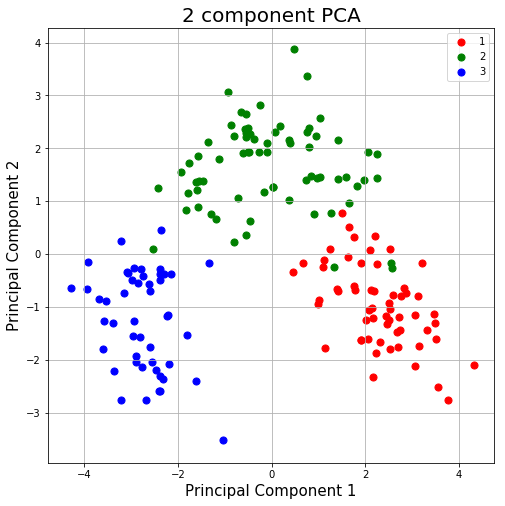

In [8]:
finalDf = pd.concat([pca2_df, df_wine[['Class label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

Przedstaw na wykresie słupkowym stosunki wariancji, które reprezentują wyznaczone składowe główne.

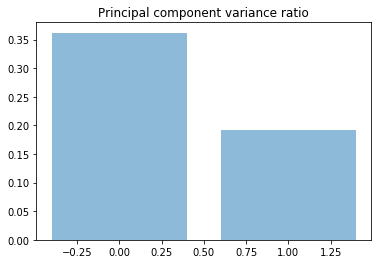

In [9]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, align='center', alpha=0.5)
plt.title('Principal component variance ratio')
plt.show()

**Zadanie 2.** Analiza zbioru *Breast Cancer Wisconsin (Diagnostic) Data Set*.

Pobieramy zbiór danych - Breast Cancer Wisconsin (Diagnostic) Data Set. Przeznaczony do klasyfikacji binarnej, problemem jest rostrzygnięcie czy dane wektory cech opisuje nowotwór złośliwy czy łagodny.

In [124]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ['id_number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion'
         , 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df = pd.read_csv(url, names=names)
features = names[1:10]
df.groupby('Class')['id_number'].nunique()

Class
2    414
4    235
Name: id_number, dtype: int64

Podziel dataframe na część zawierającą wektory cech (*data*) oraz etykiety (*labels*).

In [84]:
df = df[(df.astype(str) != '?').all(axis=1)]
data = df.loc[:, features].values
labels = df.loc[:,['Class']].values

Uwaga! zbiór danych jest niekompletny, brakujące elementy zostały oznaczone przez **?**. Uzupełnij dane lub usuń niekompletne wiersze.

Przeprowadź normalizację danych treningowych.

In [85]:
data = StandardScaler().fit_transform(data)

D:\Users\milek\Anaconda3\envs\PCA\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Users\milek\Anaconda3\envs\PCA\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Przeprowadź dwuwymiarową analizę **PCA**. Spróbuj zwizualizować zbiór danych po transformacji. Czy uwidoczniły się jakieś zależności? Spróbuj narysować wykres, na którym odróżnisz elementy różnych klas.

In [101]:
kpca = KernelPCA(n_components=3, kernel="linear")
x_kpca = kpca.fit_transform(data)
df_kpca = pd.DataFrame(data=x_kpca, columns=['component 1', 'component 2', 'component 3'])
finalDf = pd.concat([df_kpca, df[['Class']]], axis=1)

Zbadaj reprezentację w trzech wymiarach wykorzystując **PCA**. Przeprowadź wizualizację zbioru danych, wyciągnij wnioski.

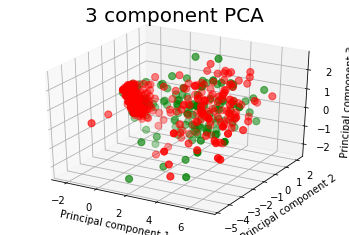

In [113]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal component 1', fontsize=10)
ax.set_ylabel('Principal component 2', fontsize=10)
ax.set_zlabel('Principal component 3', fontsize=10)

ax.set_title('3 component PCA', fontsize=20)

targets = [2.0, 4.0]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1'],
               finalDf.loc[indicesToKeep, 'component 2'],
               finalDf.loc[indicesToKeep, 'component 3'], c=color, s=50)

ax.grid()
plt.show()

Czy analiza **PCA** pozwoliła na wyciągnięcie słusznych wniosków? Zastosuj metodę **Kernel PCA** - zbuduj model 2-wymiarowy oraz 3-wymiarowy. Sporządź odpowiednie wykresy. Zbadaj zachowanie transformacji przy użyciu różnych kerneli. Czy uzyskane skupiska punktów odpowiadają etykietom odpowiednich punktów?

Dostępne kernele: linear | poly | rbf | sigmoid | cosine

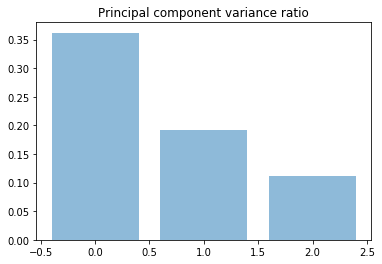

In [114]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, align='center', alpha=0.5)
plt.title('Principal component variance ratio')
plt.show()

**Zadanie 3.** Wyznaczenie z *eigenfaces*.

Wczytaj zbiór zdjęć twarzy.

In [2]:
faces = np.load('./datasets/faces.npz')['arr_0']

In [3]:
faces.shape # mamy 5000 twarzy 

(5000, 1024)

In [3]:
def print_random_face():
    # printujemy losową twarz
    index = randint(0, faces.shape[0]-1)
    example = np.zeros((32,32))
    example = faces[index, :].reshape((32,32))
    plt.imshow(np.transpose(example), cmap='gray')

Możesz użyć funkcji *print_random_face()*, aby zobaczyć kilka losowych zdjęć zawartych w zbiorze.

Celem zadania jest wykorzystanie PCA do stworzenia 100 tzw. *eigenfaces*, czyli reprezentantów zbioru zdjęć w przestrzeni 100-wymiarowej. Zaznaczmy, iż pierwotny wymiar tej przestrzeni to 1024.

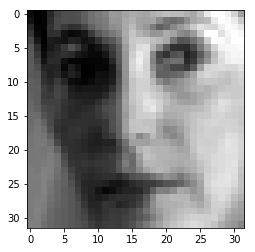

In [4]:
print_random_face()

Przeprowadź normalizację danych.

In [3]:
faces = np.load('./datasets/faces.npz')['arr_0']
normalized_faces = StandardScaler().fit_transform(faces)
pca = PCA(n_components = 2)
facesPos = pca.fit_transform(faces)

Zastosuj algorytm PCA do wyznaczenia przestrzeni o wymiarze 100 reprezentującej wyjściowy zbiór danych.

In [4]:
pca = PCA(n_components = 2)
facesPos = pca.fit_transform(faces)

Docelowy zbiór danych powinien mieć wymiar: (5000, 100).

Przedstaw na wykresie słupkowym stosunki wariancji, które reprezentują wyznaczone składowe główne.

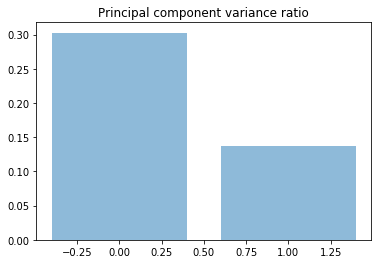

In [7]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, align='center', alpha=0.5)
plt.title('Principal component variance ratio')
plt.show()

Za pomocą poniższych instrukcji pobierz uzyskane główne składowe i przeglądnij zbiór *eigenfaces*.

In [9]:
components = pca.components_

In [10]:
def print_random_eigenface():
    index = randint(0, 99)
    eigen_face = np.zeros((32,32))
    eigen_face = components[index, :].reshape((32,32))
    plt.imshow(np.transpose(eigen_face), cmap='gray')

In [11]:
print_random_eigenface()

IndexError: index 22 is out of bounds for axis 0 with size 2

ValueError: cannot delete array elements

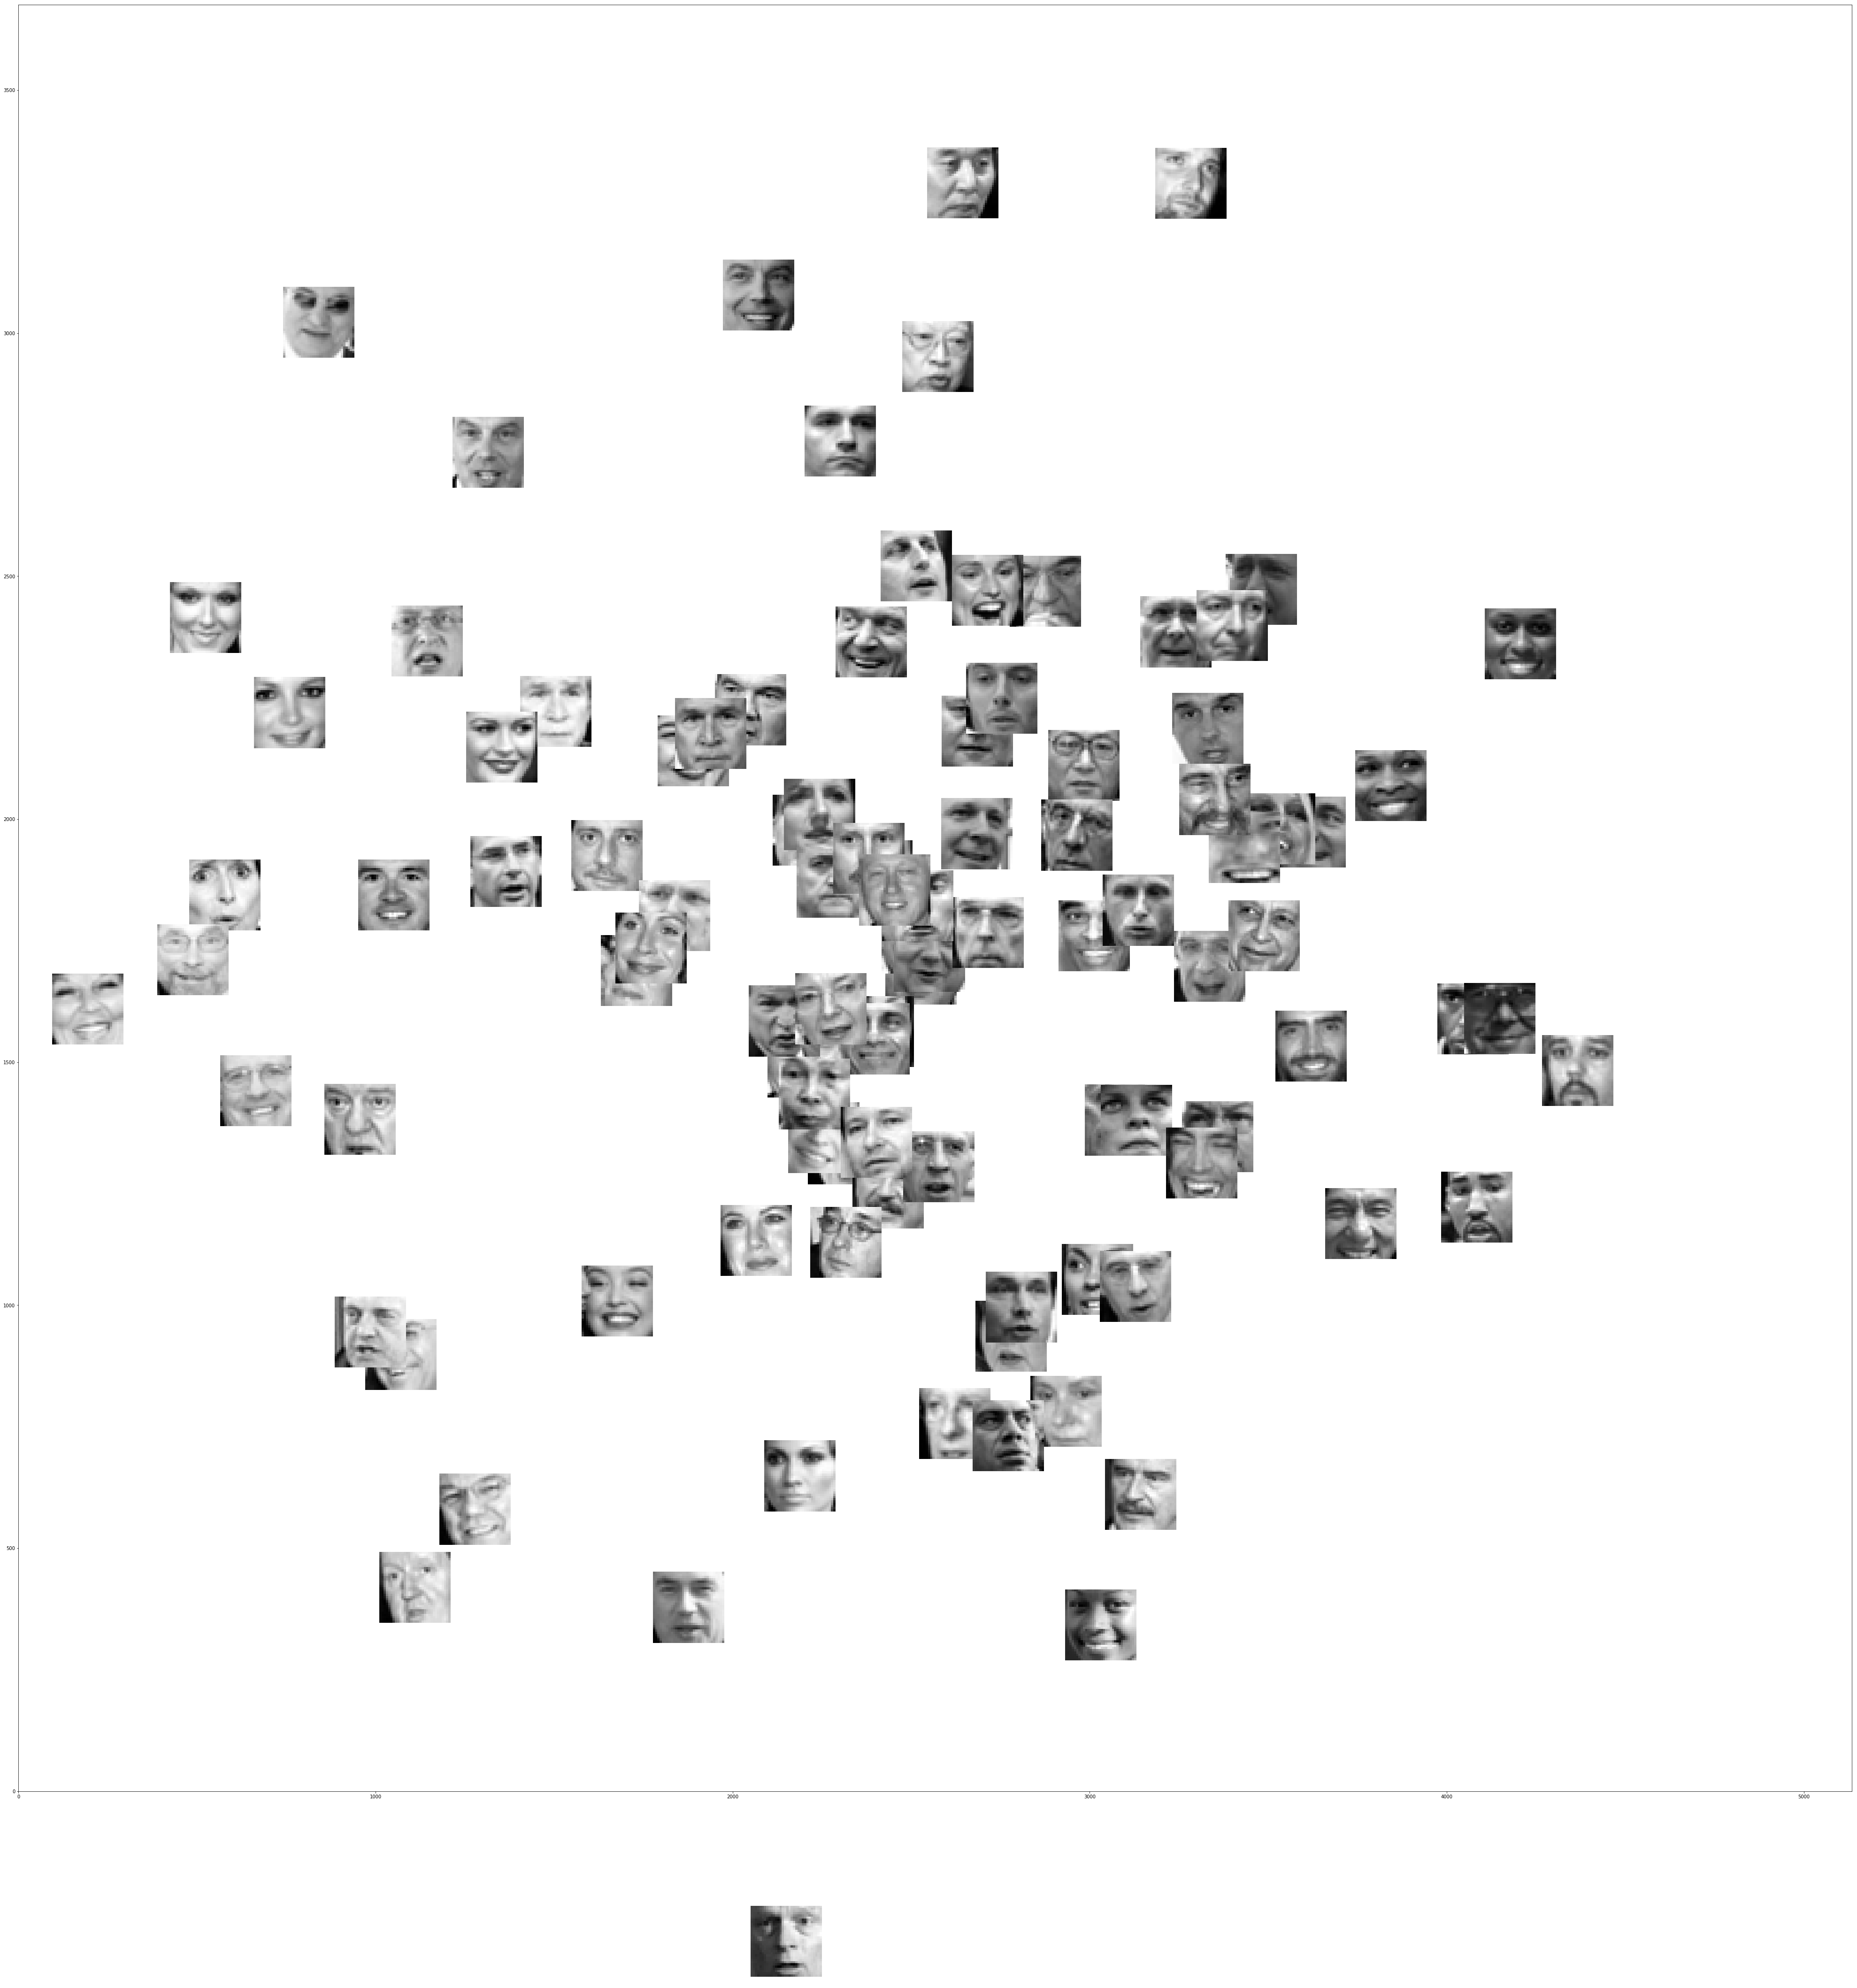

In [35]:
import random
faces = np.load('./datasets/faces.npz')['arr_0']
normalized_faces = StandardScaler().fit_transform(faces)
pca = PCA(n_components = 2)
facesPos = pca.fit_transform(faces)

x, y = zip(*facesPos)
deltaX = max(x) - min(x)
deltaY = max(y) - min(y)

fig, ax = plt.subplots()
fig.set_figheight(70)
fig.set_figwidth(70)
ax.set_xlim(right = deltaX)
ax.set_ylim(top = deltaY)

sampleList = list(zip(faces, facesPos))
random.shuffle(sampleList)

for image, position in sampleList[:100]:
    f = np.zeros((32,32))
    f = image.reshape((32,32))
    f = np.transpose(f)
    xFactor = (position[0] - minX) / deltaX
    yFactor = (position[1] - minY) / deltaY
    ax1 = fig.add_axes([xFactor, yFactor, 0.03, 0.03])
    ax1.axis('off')
    ax1.imshow(f, cmap='gray')
    


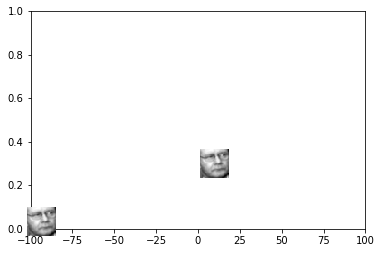

In [75]:
example = np.zeros((32,32))
example = faces[1, :].reshape((32,32))
fig, ax = plt.subplots()
ax1 = fig.add_axes([0.1, 0.1, 0.1, 0.1])
ax1.axis('off')
ax2 = fig.add_axes([0.5, 0.3, 0.1, 0.1])
ax2.axis('off')
ax1.imshow(np.transpose(example), cmap='gray')
ax2.imshow(np.transpose(example), cmap='gray')